In [1]:
import os
from datetime import datetime
import argparse
from msprime_models import * 
# from abinitio_tm import scaled_time_intervals
# from msprime_utils import scaled_time_intervals, get_het, round_coal_times, tm_counts, get_coal_data, round_bin_coal_data, normalise
from msprime_utils import *
from heatmaps_generate import *
from vcf_mhs import *
import numpy as np
import pdb
import math
import pandas as pd
from scipy.stats import entropy
import argparse
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# pecify the paramaters you want. Defaults as below

parser = argparse.ArgumentParser()
parser.add_argument("model",help="Specify the model to be used, as defined in msprime_models.")
parser.add_argument("-N","--N_0",help="Initial population size (Default is 1e+04",default=1e+04,type=int)
parser.add_argument("-L","--seq_length",help="Length of the sequence to be simulated (default 3e+07)",default=int(3e+07),type=int)
parser.add_argument("-mig","--migration_prop",help="Proportion of migrating population (default 0.3)",default=0.3,type=float)
parser.add_argument("-t","--time_splits",nargs=2,help="Time of splits, in generations (default t_1 = 2e+04, t_2 = 4e+04)",default = [int(2e+04),int(4e+04)])
parser.add_argument("-bin","--bin_length",help="The length (in bases) of the how wide you want each bin. (Default is 100)",default=100,type=int)
parser.add_argument("-o_coaldir","--output_coaldir",help="Output directory of coalescent data",default=os.getcwd() + '/coal_data/',type=str)
parser.add_argument("-o_coalname","--output_coalname",help="Output name for coal_data filename",default='',type=str)
parser.add_argument("-o_mhsdir","--output_mhsdir",help="Output dir for vcf and mhs data",default=os.getcwd() + '/vcf_mhs/',type=str)
parser.add_argument("-o_mhsname","--output_mhsname",help="Output name for vcf and mhs data",default = '',type=str)
parser.add_argument("-rho","--recomb_rate",help="Rate of recombination per bp per generation",default=2e-08,type=float)
parser.add_argument("-mew","--mut_rate",help="Rate of mutation per bp per generation",default=2e-08,type=float)
parser.add_argument("--suffix_time",help="Boolean, whether to write the time in to the files (useful for multi runs of the same simulation",action="store_true")
parser.add_argument("--print",help="Print the DemographicDebugger (from msprime) and the number of segratating sites",action="store_true")
parser.add_argument("--tree",help="Draw trees and info per segment",action="store_true")
args = parser.parse_args("m0001".split())

In [3]:
# scaled_time_intervals 

mu = 2e-08
alpha = 0.1
N_0 = 10000 # TODO, use sim
Tmax = 15
N_T = 50
T = [0]
for i in range(0,N_T): # TODO: should T have upper interval
        T.append( alpha*math.exp( (i/N_T)*math.log(1 + Tmax/alpha) - 1))
T_np = np.array(T) # convert to numpy
# scale these to generations with *2*N_0, as per Schiffels' instruction
T_scaled_np = T_np * 2 * N_0

## Mig01

History where 0.1 of lineages migrate to another population at time T_1, then return back at time T_2.

In [4]:
path =  '/home/trevor/ancestry/coal_data/mig01/'
files = os.listdir(path)
print('Files are:\m')
for i in range(len(files)):
    print(f'File {i} is {path + files[i]}')
seq_length = 150e+06 # length of sequence used for simulations
mig01_tms = np.zeros(shape=(N_T,N_T))



Files are:\m
File 0 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_093903.txt
File 1 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_094150.txt
File 2 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_094432.txt
File 3 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_094722.txt
File 4 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_095007.txt
File 5 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_095250.txt
File 6 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_095527.txt
File 7 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_095814.txt
File 8 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_100053.txt
File 9 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_struct0001_mig1_100332.txt
File 10 is /home/trevor/ancestry/coal_data/mig01/20201127_instant_s

In [5]:
for i in range(len(files)):
    print('on iteration {} of {}; file is {}'.format(i,len(files),files[i]))
    test = np.loadtxt(path+files[0],comments="#")
    coal_times = round_bin_coal_data(seq_length,test, args)
    coal_times_intervals = round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    mig01_tms = mig01_tms + tm

on iteration 0 of 22; file is 20201127_instant_struct0001_mig1_093903.txt
on iteration 1 of 22; file is 20201127_instant_struct0001_mig1_094150.txt
on iteration 2 of 22; file is 20201127_instant_struct0001_mig1_094432.txt
on iteration 3 of 22; file is 20201127_instant_struct0001_mig1_094722.txt
on iteration 4 of 22; file is 20201127_instant_struct0001_mig1_095007.txt
on iteration 5 of 22; file is 20201127_instant_struct0001_mig1_095250.txt
on iteration 6 of 22; file is 20201127_instant_struct0001_mig1_095527.txt
on iteration 7 of 22; file is 20201127_instant_struct0001_mig1_095814.txt
on iteration 8 of 22; file is 20201127_instant_struct0001_mig1_100053.txt
on iteration 9 of 22; file is 20201127_instant_struct0001_mig1_100332.txt
on iteration 10 of 22; file is 20201127_instant_struct0001_mig1_100607.txt
on iteration 11 of 22; file is 20201127_instant_struct0001_mig1_100851.txt
on iteration 12 of 22; file is 20201127_instant_struct0001_mig1_101136.txt
on iteration 13 of 22; file is 2020

/home/trevor/ancestry/heatmaps_generate.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


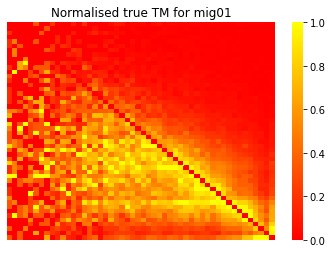

In [6]:
tm_norm_mig01 = normalise(mig01_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mig01 = np.copy(tm_norm_mig01)
tm_nd_mig01[range(0,len(tm_nd_mig01)),range(0,len(tm_nd_mig01))] = 0
tm_nd_norm_mig01 = normalise(tm_nd_mig01,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mig01,'colmax'),title='Normalised true TM for mig01') # show heatmap

## Matching_mig01

History with genuine population size changes, where the coalescent rate matches the mig01 history (as detected by PSMC)

In [9]:
path =  '/home/trevor/ancestry/coal_data/matching_mig01/'
files = os.listdir(path)
print('Files are:\m')
for i in range(len(files)):
    print(f'File {i} is {path + files[i]}')
seq_length = 150e+06 # length of sequence used for simulations
matchingmig01_tms = np.zeros(shape=(N_T,N_T))

for i in range(len(files)):
    print('on iteration {} of {}; file is {}'.format(i,len(files),files[i]))
    test = np.loadtxt(path+files[0],comments="#")
    coal_times = round_bin_coal_data(seq_length,test, args)
    coal_times_interval= round_coal_times(coal_times,T_scaled_np,N_T)
    tm = tm_counts(coal_times_intervals,N_T=N_T)
    matchingmig01_tms = matchingmig01_tms + tm



Files are:\m
File 0 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_095210.txt
File 1 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_095435.txt
File 2 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_095650.txt
File 3 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_095905.txt
File 4 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_100121.txt
File 5 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_100336.txt
File 6 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_100556.txt
File 7 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_100814.txt
File 8 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_101035.txt
File 9 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_101253.txt
File 10 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_101512.txt
File 11 is /home/trevor/ancestry/coal_data/matching_mig01/matching_mig01_

/home/trevor/ancestry/heatmaps_generate.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


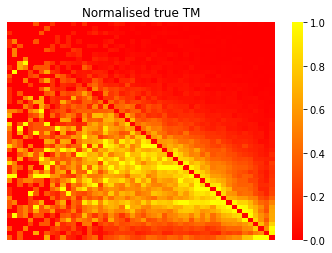

In [10]:
tm_norm_mmig01 = normalise(matchingmig01_tms,'colsum') # normalise this such that it represents a probability distribution

# remove diagonals. let nd stand for 'nodiagonals'
tm_nd_mmig01 = np.copy(tm_norm_mmig01)
tm_nd_mmig01[range(0,len(tm_nd_mmig01)),range(0,len(tm_nd_mmig01))] = 0
tm_nd_norm_mmig01 = normalise(tm_nd_mmig01,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# TODO left-most and upper-most column look strange - try and fix. Update, think this is ok
heatmaps_seq(normalise(tm_nd_mmig01,'colmax'),title='Normalised true TM') # show heatmap
# heatmaps_seq(normalise(,'colmax'),title='Normalised true TM') # show heatmap


mig01_tms is 
[[8.99602e+05 0.00000e+00 0.00000e+00 ... 6.60000e+01 0.00000e+00
  0.00000e+00]
 [0.00000e+00 1.02652e+05 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.20000e+01 0.00000e+00 1.39854e+05 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [4.40000e+01 0.00000e+00 0.00000e+00 ... 3.07384e+05 3.56400e+03
  6.95200e+03]
 [0.00000e+00 0.00000e+00 2.20000e+01 ... 3.60800e+03 2.07504e+05
  6.71000e+03]
 [4.40000e+01 0.00000e+00 2.20000e+01 ... 6.42400e+03 6.57800e+03
  3.77168e+05]]
tm_nd_mig01 is 
[[   0.    0.    0. ...   66.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [  22.    0.    0. ...    0.    0.    0.]
 ...
 [  44.    0.    0. ...    0. 3564. 6952.]
 [   0.    0.   22. ... 3608.    0. 6710.]
 [  44.    0.   22. ... 6424. 6578.    0.]]
normalise(tm_nd_mig01,"colmax") is 
[[0.         0.         0.         ... 0.01027397 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.16666667 0.         0.      

/home/trevor/ancestry/heatmaps_generate.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


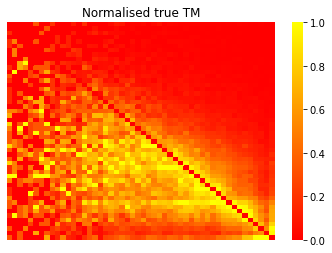

In [28]:
# mig01_tms
# tm_nd_norm_mig01
# tm_nd_norm_mmig01
# test12345 = mig01_tms

print('mig01_tms is \n{}'.format(mig01_tms))
tm_nd_mig01 = np.copy(mig01_tms)
tm_nd_mig01[range(0,len(tm_nd_mig01)),range(0,len(tm_nd_mig01))] = 0
print('tm_nd_mig01 is \n{}'.format(tm_nd_mig01))
print('normalise(tm_nd_mig01,"colmax") is \n{}'.format(normalise(tm_nd_mig01,'colmax')))

heatmaps_seq(normalise(tm_nd_mig01,'colmax'),title='Normalised true TM') # show heatmap
# tm_nd_mmig01[range(0,len(tm_nd_mmig01)),range(0,len(tm_nd_mmig01))] = 0
# tm_nd_norm_mmig01 = normalise(tm_nd_mmig01,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# tm_nd_norm_mmig01
# test54321 = matchingmig01_tms
# tm_nd_norm_mig01

matchingmig01_tms is 
[[1.267621e+06 0.000000e+00 0.000000e+00 ... 9.300000e+01 0.000000e+00
  0.000000e+00]
 [0.000000e+00 1.446460e+05 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [3.100000e+01 0.000000e+00 1.970670e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [6.200000e+01 0.000000e+00 0.000000e+00 ... 4.331320e+05 5.022000e+03
  9.796000e+03]
 [0.000000e+00 0.000000e+00 3.100000e+01 ... 5.084000e+03 2.923920e+05
  9.455000e+03]
 [6.200000e+01 0.000000e+00 3.100000e+01 ... 9.052000e+03 9.269000e+03
  5.314640e+05]]
tm_nd_mmig01 is 
[[   0.    0.    0. ...   93.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [  31.    0.    0. ...    0.    0.    0.]
 ...
 [  62.    0.    0. ...    0. 5022. 9796.]
 [   0.    0.   31. ... 5084.    0. 9455.]
 [  62.    0.   31. ... 9052. 9269.    0.]]
normalise(tm_nd_mmig01,"colmax") is 
[[0.         0.         0.         ... 0.01027397 0.         0.        ]
 [0.         0.         0.         ... 0.         0.       

/home/trevor/ancestry/heatmaps_generate.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


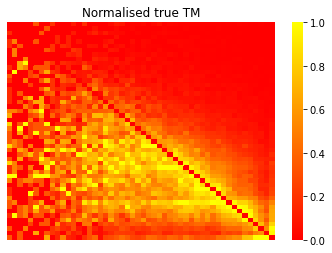

In [29]:
print('matchingmig01_tms is \n{}'.format(matchingmig01_tms))
tm_nd_mmig01 = np.copy(matchingmig01_tms)
tm_nd_mmig01[range(0,len(tm_nd_mmig01)),range(0,len(tm_nd_mmig01))] = 0
print('tm_nd_mmig01 is \n{}'.format(tm_nd_mmig01))
heatmaps_seq(normalise(tm_nd_mmig01,'colmax'),title='Normalised true TM') # show heatmap
print('normalise(tm_nd_mmig01,"colmax") is \n{}'.format(normalise(tm_nd_mmig01,'colmax')))
# tm_nd_mmig01[range(0,len(tm_nd_mmig01)),range(0,len(tm_nd_mmig01))] = 0
# tm_nd_norm_mmig01 = normalise(tm_nd_mmig01,'colsum') # normalise over max of each columnn (return a probability distribution over columns)

# tm_nd_norm_mmig01
# test54321 = matchingmig01_tms
# tm_nd_norm_mig01
